<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-数据初探" data-toc-modified-id="1.-数据初探-1">1. 数据初探</a></span><ul class="toc-item"><li><span><a href="#1.1-导入数据" data-toc-modified-id="1.1-导入数据-1.1">1.1 导入数据</a></span></li><li><span><a href="#1.2-关键变量" data-toc-modified-id="1.2-关键变量-1.2">1.2 关键变量</a></span></li></ul></li><li><span><a href="#2.-第一轮数据清洗" data-toc-modified-id="2.-第一轮数据清洗-2">2. 第一轮数据清洗</a></span><ul class="toc-item"><li><span><a href="#2.1-缺失值的处理" data-toc-modified-id="2.1-缺失值的处理-2.1">2.1 缺失值的处理</a></span></li><li><span><a href="#2.2-独特率" data-toc-modified-id="2.2-独特率-2.2">2.2 独特率</a></span></li></ul></li><li><span><a href="#3-第二轮数据清洗" data-toc-modified-id="3-第二轮数据清洗-3">3 第二轮数据清洗</a></span><ul class="toc-item"><li><span><a href="#3.1-异数/异常" data-toc-modified-id="3.1-异数/异常-3.1">3.1 异数/异常</a></span></li></ul></li></ul></div>

In [3]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## 1. 数据初探

### 1.1 导入数据

**载入数据**

In [4]:
df = pd.read_pickle('../Data/IT_2018.pkl')
# 如果是csv文件，则使用以下代码，同时，注意相对路径和绝对路径
# df = pd.read_csv('../Data/2018_test_demo.pkl')

**对数据集有点基本印象**

In [5]:
# 多少行，多少列
df.shape

(56311, 152)

In [6]:
df.info()
# 当我们的变量太多的时候，有时候pandas并不会将所有显示出来, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56311 entries, 421101 to 1611872
Columns: 152 entries, id to IssueDate
dtypes: datetime64[ns](1), float64(113), object(38)
memory usage: 65.7+ MB


In [7]:
df.info(verbose=True, show_counts=True)
# verbose == 啰唆一点

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56311 entries, 421101 to 1611872
Data columns (total 152 columns):
 #    Column                                      Non-Null Count  Dtype         
---   ------                                      --------------  -----         
 0    id                                          56311 non-null  object        
 1    member_id                                   0 non-null      float64       
 2    loan_amnt                                   56311 non-null  float64       
 3    funded_amnt                                 56311 non-null  float64       
 4    funded_amnt_inv                             56311 non-null  float64       
 5    term                                        56311 non-null  object        
 6    int_rate                                    56311 non-null  float64       
 7    installment                                 56311 non-null  float64       
 8    grade                                       56311 non-null  object 

In [8]:
# 随机显示5行数据
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,IssueDate
502553,127504315,NaN,18000.0,18000.0,18000.0,36 months,21.45,682.32,D,D5,Administrator,3 years,OWN,65000.0,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,230xx,VA,34.35,0.0,Mar-2005,690.0,694.0,1.0,25.0,NaN,22.0,0.0,15844.0,40.9,38.0,w,0.0,0.0,19787.918299,19787.92,18000.00,1753.80,34.12,0.0,0.0,Jul-2018,17219.51,NaN,Feb-2019,684.0,680.0,0.0,56.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,118195.0,2.0,12.0,0.0,2.0,14.0,102351.0,119.0,4.0,5.0,9568.0,88.0,38700.0,3.0,0.0,1.0,7.0,5628.0,14963.0,50.9,0.0,0.0,149.0,154.0,6.0,6.0,0.0,6.0,25.0,6.0,25.0,3.0,4.0,5.0,5.0,11.0,19.0,10.0,19.0,5.0,22.0,0.0,0.0,0.0,4.0,77.1,40.0,0.0,0.0,137929.0,118195.0,30500.0,99229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01
841337,137469320,NaN,20000.0,20000.0,20000.0,36 months,14.47,688.13,C,C2,NaN,NaN,RENT,21191.0,Source Verified,Jul-2018,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,179xx,PA,3.12,0.0,Apr-1996,755.0,759.0,0.0,38.0,NaN,7.0,0.0,279.0,1.7,14.0,w,0.0,0.0,655.970000,655.97,446.96,209.01,0.00,0.0,0.0,Aug-2018,688.13,NaN,Feb-2019,644.0,640.0,0.0,NaN,1.0,Joint App,51371.0,21.89,Source Verified,0.0,0.0,279.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,218.0,2.0,16500.0,0.0,0.0,0.0,0.0,47.0,3282.0,6.2,0.0,0.0,NaN,267.0,61.0,61.0,0.0,77.0,NaN,NaN,38.0,0.0,1.0,2.0,1.0,6.0,0.0,7.0,14.0,2.0,7.0,0.0,0.0,0.0,0.0,92.9,0.0,0.0,0.0,165

### 1.2 关键变量

In [9]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.842535
Charged Off    0.157465
Name: loan_status, dtype: float64

In [10]:
# 更改某一个变量里的值或者多个值
df["loan_status"].replace({"Fully Paid": "付清", "Charged Off": "违约"}, inplace=True)

In [11]:
df['loan_status'].value_counts(normalize=False)

付清    47444
违约     8867
Name: loan_status, dtype: int64

In [12]:
# 查看我们的关键变量是否有缺失
df['loan_status'].isnull().sum()

0

## 2. 第一轮数据清洗

### 2.1 缺失值的处理

通常情况下，Pandas或者numpy里的缺失值是用NaN或者NA来表示的。但也要小心，有一些特定的数据会有不同的缺失值表示，比如9999。

In [13]:
# pandas自带的缺失值数量求和
df.isnull().sum()

id                                                0
member_id                                     56311
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      5387
emp_length                                     4934
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
desc        

In [38]:
df.isnull().mean()

id                                            0.000000
member_id                                     1.000000
loan_amnt                                     0.000000
funded_amnt                                   0.000000
funded_amnt_inv                               0.000000
term                                          0.000000
int_rate                                      0.000000
installment                                   0.000000
grade                                         0.000000
sub_grade                                     0.000000
emp_title                                     0.095665
emp_length                                    0.087621
home_ownership                                0.000000
annual_inc                                    0.000000
verification_status                           0.000000
issue_d                                       0.000000
loan_status                                   0.000000
pymnt_plan                                    0.000000
url       

In [14]:
# 只要有空位，都算缺失。所以这里有非常多，比我们的行数还多。
df.isnull().sum().sum()

2325293

**有没有一种方式，能输入一个dataframe,然后直接输出一个表格，包含变量的缺失值和缺失率呢？**

In [15]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("你所选择的数据有 " + str(df.shape[1]) + " 列.\n" "其中有 " + str(mis_val_table_ren_columns.shape[0]) + " 列的变量是有缺失值的.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

你所选择的数据有 152 列.
其中有 62 列的变量是有缺失值的.


,Missing Values,% of Total Values,type
member_id,56311,100.0,float64
desc,56311,100.0,object
next_pymnt_d,56311,100.0,object
orig_projected_additional_accrued_interest,56306,100.0,float64
hardship_dpd,56286,100.0,float64
hardship_length,56286,100.0,float64
hardship_status,56286,100.0,object
deferral_term,56286,100.0,float64
hardship_amount,56286,100.0,float64
hardship_start_date,56286,100.0,object


**咱们就以50%为界限，如果一个变量有超过50%的缺失的话，我们就将其抛弃**

In [17]:
missing_frac = df.isnull().mean()
drop_list = sorted(missing_frac[missing_frac > 0.50].index)

In [18]:
len(drop_list)

44

In [19]:
# 最常见的删除变量的方式
# df.drop(labels=["a","b","c"], axis=1, inplace=True)

In [20]:
# 定义一个删除变量的函数，只要把要删除的变量列表放进去就行，方便之后使用
def drop_cols(cols):
    df.drop(labels=cols, axis=1, inplace=True)

In [21]:
drop_cols(drop_list)

**下一步可以根据自己的需要删除一些变量，这一步的主观性比较强**
**这里我选择的变量基于的理由是：这些信息是贷款拿到之后才有的信息，对实际操作指导意义不大**

In [22]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths','avg_cur_bal', 
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
             'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 
             'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
             'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 
             'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
             'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
             'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
             'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv',
             'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 
             'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
             'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
             'total_rev_hi_lim','earliest_cr_line']

In [23]:
drop_cols(drop_list)

In [24]:
missing_values_table(df)

你所选择的数据有 49 列.
其中有 8 列的变量是有缺失值的.


,Missing Values,% of Total Values,type
il_util,9365,16.6,float64
emp_title,5387,9.6,object
emp_length,4934,8.8,object
mths_since_rcnt_il,1868,3.3,float64
mo_sin_old_il_acct,1868,3.3,float64
dti,151,0.3,float64
revol_util,74,0.1,float64
all_util,15,0.0,float64


In [25]:
# 删除行，具有缺失值的行
def drop_null_row(cols):
    df.dropna(subset=cols, axis=0, inplace=True)

In [26]:
drop_list = ['all_util', 'revol_util', 'dti']

In [27]:
drop_null_row(drop_list)

In [28]:
missing_values_table(df)

你所选择的数据有 49 列.
其中有 5 列的变量是有缺失值的.


,Missing Values,% of Total Values,type
il_util,9297,16.6,float64
emp_title,5227,9.3,object
emp_length,4775,8.5,object
mths_since_rcnt_il,1850,3.3,float64
mo_sin_old_il_acct,1850,3.3,float64


### 2.2 独特率

**这里我们不能再使用一个比例来剔除独特率高或者低的变量了，因为对于不同的变量，独特率高或者低都有可能是正常的**

In [29]:
df.nunique()

id                      56086
loan_amnt                1304
term                        2
int_rate                  110
installment             12281
grade                       7
sub_grade                  35
emp_title               22398
emp_length                 11
home_ownership              4
annual_inc               5628
verification_status         3
issue_d                    12
loan_status                 2
url                     56086
purpose                    13
title                      12
zip_code                  868
addr_state                 50
dti                      5195
fico_range_low             38
fico_range_high            38
open_acc                   59
pub_rec                     9
revol_bal               26507
revol_util               1050
total_acc                 110
initial_list_status         2
policy_code                 1
application_type            2
open_acc_6m                13
open_act_il                39
open_il_12m                 7
open_il_24

我们可以看出， id和url拥有着100%的独特率。然后再结合其定义，会发现这个变量对模型是没有什么帮助的。

In [30]:
drop_list = ['id', 'emp_title', 'url']

In [31]:
drop_cols(drop_list)

## 3 第二轮数据清洗

目前我们已经从152个变量缩减为45个变量了。那么就要进行稍微精细化的一些处理了

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56086 entries, 421101 to 1611872
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             56086 non-null  float64       
 1   term                  56086 non-null  object        
 2   int_rate              56086 non-null  float64       
 3   installment           56086 non-null  float64       
 4   grade                 56086 non-null  object        
 5   sub_grade             56086 non-null  object        
 6   emp_length            51311 non-null  object        
 7   home_ownership        56086 non-null  object        
 8   annual_inc            56086 non-null  float64       
 9   verification_status   56086 non-null  object        
 10  issue_d               56086 non-null  object        
 11  loan_status           56086 non-null  object        
 12  purpose               56086 non-null  object        
 13  title    

### 3.1 异数/异常

有些人会在这里直接做相关系数检查，我个人倾向于在剩余变量不是那么多的情况下，一个一个排查，然后进行精细化处理。 最后再做相关系数检查。 

最常规的检查方式是这样的

<AxesSubplot:>

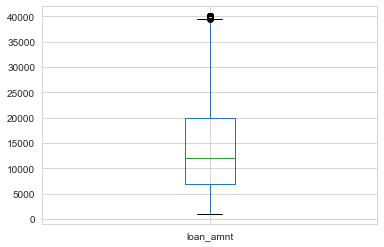

In [33]:
df.boxplot(column=['loan_amnt'])

array([[<AxesSubplot:title={'center':'loan_amnt'}>]], dtype=object)

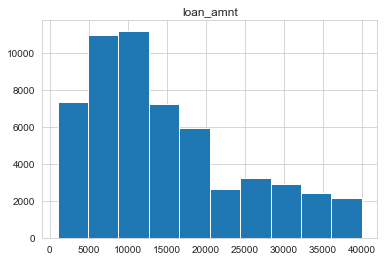

In [35]:
df.hist(column=['loan_amnt'])

我们是否可以将几个放在同一个图里面呢？ 其实是可以的，但是我并不推荐，除非你设置不同的y轴，否则无法进行对比

<AxesSubplot:>

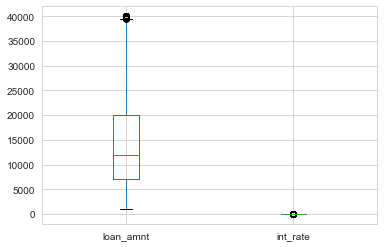

In [34]:
df.boxplot(column=['loan_amnt', 'int_rate'])

**那么是否有更聪明的方式，或者更好看的图来供我们研究呢？**
**比如我们想要在研究每一个变量的时候，同时展示他们的分布图，盒子图，密度图，同时还要进行分组**

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)

sns.set_style('whitegrid')
%matplotlib inline

In [44]:
# Yanxia Li
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', height=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [46]:
df["loan_status"].replace({"付清": "Fully Paid", "违约": "Charged Off"}, inplace=True)

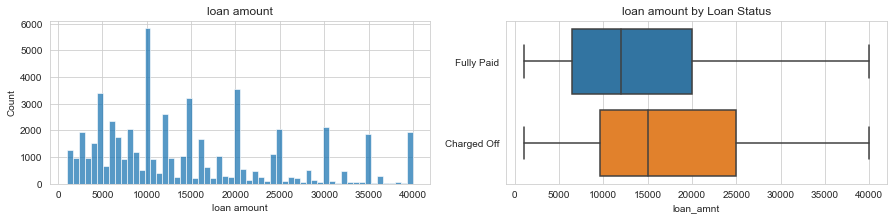

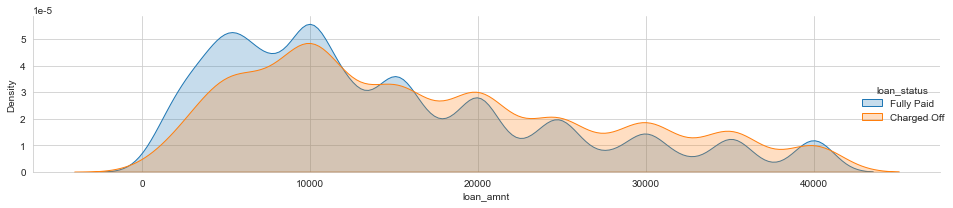

In [47]:
plot_var('loan_amnt', 'loan amount', continuous=True)

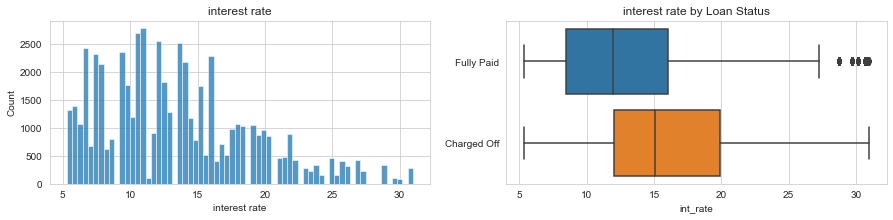

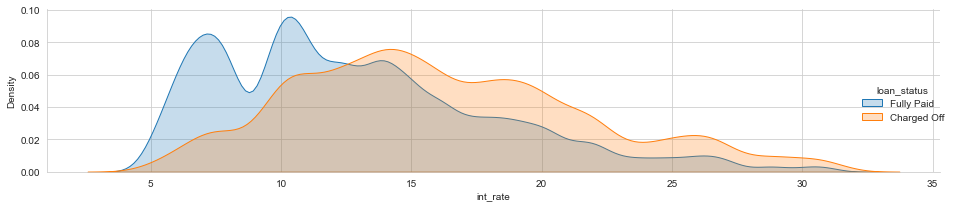

In [48]:
plot_var('int_rate', 'interest rate', continuous=True)
# 此处我们明显发现

D:\Soft\Anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


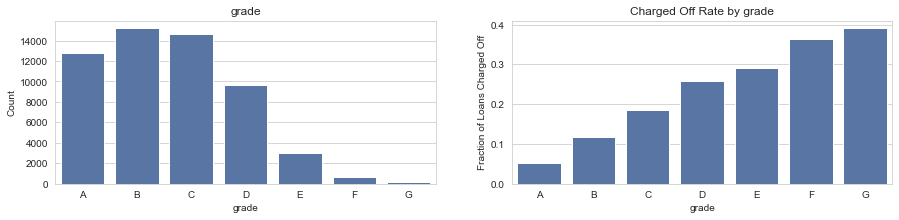

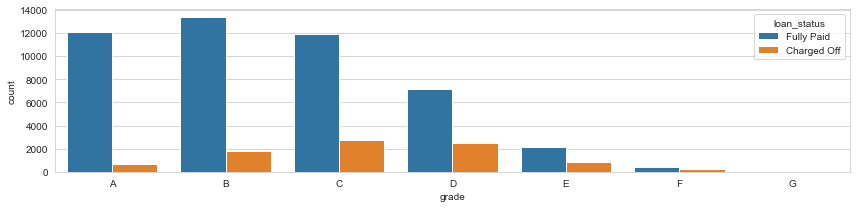

In [50]:
plot_var('grade', 'grade', continuous=False)